# Classifying Flight Delay Data Using: Logistic Regression, Decision Tree, Extra Trees, Gradient Boosting and Random Forest Classifiers

# Group 7

## Overview

Dataset obtained from Kaggle :
https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations?select=train_sets_documentation.txt

Dataset contains information on flights occurring in 2019, with statistics on flight delay, carrier and airport information and weather data.

Classifier selection and process guided by https://github.com/nive927/Flight_Delay_Prediction/blob/main/05_Classification.ipynb

# **Load Adjusted Dataset**

The original dataset on Kaggle removed a large amount of weather data during the final data cleaning steps. In order to improve our weather based predictions we re-ran the data collection process and re-included removed data points.

### Preview of available data

In [3]:
#load data into pandas

# importing the module
import pandas as pd

flight_data = pd.read_csv('data/train.csv')

In [4]:
pd.set_option('display.max_columns', None)
flight_data.head() #display sample dataframe

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,TAVG,TMIN,WT01,WT02,WT03,WT05,WT07,WT08,WT09,WT10,WT11,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,79247,7972,2006675,11744595,0.000098,0.000177,6,Douglas Municipal,35.219,-80.936,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,83.0,75.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,67082,3655,2743323,3472966,0.000034,0.000099,15,Stapleton International,39.774,-104.880,El Paso International,0.00,0.0,0.0,71.0,11.41,57.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,25517,300,90547,1204766,0.000348,0.000107,3,Adams Field,34.729,-92.234,NONE,0.00,0.0,0.0,54.0,0.45,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,114119,3282,1023434,13382999,0.000062,0.000099,19,San Diego International Lindbergh Fl,32.733,-117.187,San Jose International,0.00,0.0,0.0,64.0,8.05,60.0,56.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,28267,6058,3103410,1204766,0.000348,0.000107,15,Chicago O'Hare International,41.978,-87.906,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,83.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203263,0.193761,0.203027,0.113050


In [5]:
print("Available data points within dataset:")
for col in flight_data.columns: 
    print(col)

Available data points within dataset:
MONTH
DAY_OF_WEEK
DEP_DEL15
DEP_TIME_BLK
DISTANCE_GROUP
SEGMENT_NUMBER
CONCURRENT_FLIGHTS
NUMBER_OF_SEATS
CARRIER_NAME
AIRPORT_FLIGHTS_MONTH
AIRLINE_FLIGHTS_MONTH
AIRLINE_AIRPORT_FLIGHTS_MONTH
AVG_MONTHLY_PASS_AIRPORT
AVG_MONTHLY_PASS_AIRLINE
FLT_ATTENDANTS_PER_PASS
GROUND_SERV_PER_PASS
PLANE_AGE
DEPARTING_AIRPORT
LATITUDE
LONGITUDE
PREVIOUS_AIRPORT
PRCP
SNOW
SNWD
TMAX
AWND
TAVG
TMIN
WT01
WT02
WT03
WT05
WT07
WT08
WT09
WT10
WT11
CARRIER_HISTORICAL
DEP_AIRPORT_HIST
DAY_HISTORICAL
DEP_BLOCK_HIST


Exploration of the major airlines covered by the data

## Set up Environment

In [6]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import pointbiserialr

## Determine how many observations fall under each class 
### 0 : not delayed 1 : delayed

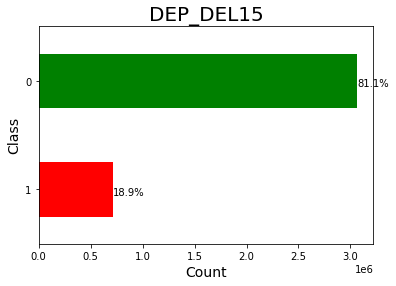

0    3066926
1     714601
Name: DEP_DEL15, dtype: int64


In [7]:
# Plotting the percentage of observations that fall under each class
ax = flight_data["DEP_DEL15"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("DEP_DEL15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(flight_data["DEP_DEL15"].value_counts())
fig = ax.get_figure()

## Point Biserial Correlation for Quantitative, Continuous Features with DEP_DEL15

A correlation coefficient measures the extent to which two variables tend to change together. The coefficient describes both the strength and the direction of the relationship.

A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable.  [Interpreting PBC](https://www.scalestatistics.com/point-biserial.html)

We see that the highest correlation for DEP_DEL15 is with WTO3 (Thunder), PRCP (precipitation) and WT01 (fog).

In [8]:
#Encode to numerical values 
labelEncoder = LabelEncoder()
flight_data["CARRIER_NAME"] = labelEncoder.fit_transform(flight_data["CARRIER_NAME"])
flight_data["PREVIOUS_AIRPORT"] = labelEncoder.fit_transform(flight_data["PREVIOUS_AIRPORT"])

# get continuous and dichotomous data
categorical = ["DEP_DEL15","AIRLINE_FLIGHTS_MONTH", "AVG_MONTHLY_PASS_AIRLINE", "FLT_ATTENDANTS_PER_PASS", "GROUND_SERV_PER_PASS", "PLANE_AGE", "DEPARTING_AIRPORT","PREVIOUS_AIRPORT","CARRIER_HISTORICAL"
,"DEP_AIRPORT_HIST","CARRIER_NAME"]
numeric = ["PRCP", "SNOW", "SNWD", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT07","WT08","WT09","WT10","WT11"]
target = flight_data["DEP_DEL15"]

# pbc of first question
pbc = list()
for col in numeric:
    ans = pointbiserialr(flight_data[col], target)
    pbc.append([col, ans[0], ans[1]])
    
pbc_corr = pd.DataFrame(pbc, columns=["Feature", "CorrCoeff", "pValue"]).sort_values(by="CorrCoeff", ascending=False).reset_index(drop=True)
pbc_corr

,Feature,CorrCoeff,pValue
0,WT03,0.087747,0.000000e+00
1,PRCP,0.080137,0.000000e+00
2,WT01,0.068952,0.000000e+00
3,AWND,0.050673,0.000000e+00
4,SNOW,0.050223,0.000000e+00
5,WT02,0.026787,0.000000e+00
6,SNWD,0.026357,0.000000e+00
7,WT09,0.021574,0.000000e+00
8,WT05,0.017079,6.493422e-242
9,WT08,0.016897,8.224131e-237


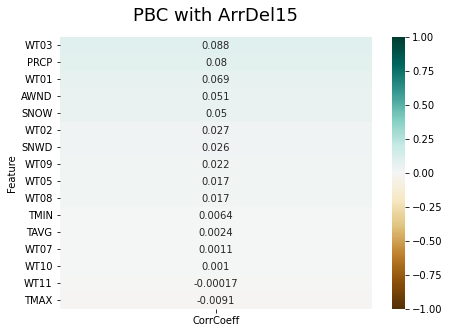

In [9]:
plt.figure(figsize=(7, 5))
pbc_corr = pbc_corr.set_index("Feature")
heatmap = sns.heatmap(pbc_corr[["CorrCoeff"]].sort_values(by="CorrCoeff", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("PBC with ArrDel15", fontdict={"fontsize":18}, pad=16);


## Spearman Coefficient with categorical data

Weather is not the only factor that causes delays. We can see here that there is a strong correlation between Carrier Historical delays and Departing Airport Historical delays and the likelihood of a departure delay.

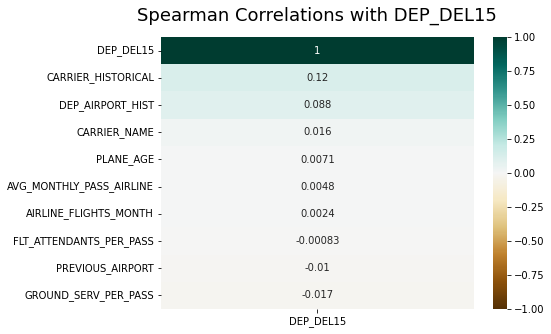

In [10]:
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(flight_data[categorical].corr(method="spearman")[["DEP_DEL15"]].sort_values(by="DEP_DEL15", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Spearman Correlations with DEP_DEL15", fontdict={"fontsize":18}, pad=16)
#plt.savefig("Img/05_03_Spearman_ArrDel15.png")
del heatmap

## Modify Data to Prepare for Modeling

Encode non-numerical values ot numerical. Check for and remove any null values.

In [11]:
#Encode to numerical values 
labelEncoder = LabelEncoder()
flight_data["CARRIER_NAME"] = labelEncoder.fit_transform(flight_data["CARRIER_NAME"])
flight_data["PREVIOUS_AIRPORT"] = labelEncoder.fit_transform(flight_data["PREVIOUS_AIRPORT"])
flight_data["DEPARTING_AIRPORT"] = labelEncoder.fit_transform(flight_data["DEPARTING_AIRPORT"])
flight_data["DEP_TIME_BLK"] = labelEncoder.fit_transform(flight_data["DEP_TIME_BLK"])

flight_data = flight_data.apply(pd.to_numeric)

# applying the method
nan_in_df = flight_data.isnull().sum().sum()
 
# printing the number of values present in
# the whole dataframe
print('Number of NaN values present: ' + str(nan_in_df))

flight_data.dropna(subset=['DEP_AIRPORT_HIST','DAY_HISTORICAL','DEP_BLOCK_HIST'], inplace=True)


Number of NaN values present: 3


## Feature Selection

Select feature list and standardize data. Run and display feature importance ranking.

In [14]:
#Select all X data
X = flight_data[["AIRLINE_FLIGHTS_MONTH", "AVG_MONTHLY_PASS_AIRLINE", "FLT_ATTENDANTS_PER_PASS", "GROUND_SERV_PER_PASS", "PLANE_AGE","CARRIER_HISTORICAL"
,"DEP_AIRPORT_HIST","DAY_HISTORICAL","DEP_BLOCK_HIST","CONCURRENT_FLIGHTS","PRCP", "SNOW", "SNWD", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT07","WT08","WT09","WT10","WT11"]]

#Standardize weather data
XNormed = (X - X.mean())/(X.std())

#Set Y data to DEP_DEL15
y = np.asarray(flight_data["DEP_DEL15"])

#Run model
#model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)
#model.fit(XNormed, y)

#Save model to joblib
#joblib.dump(model, "data/feature_importance_model.joblib")

#Run model from joblib
model = joblib.load("./Data/feature_importance_model.joblib")

importances = model.feature_importances_
importances

array([2.42167193e-02, 1.10477198e-02, 9.67082427e-03, 1.09765307e-02,
       1.56041574e-01, 3.07637345e-02, 1.38776071e-01, 5.46399537e-02,
       1.21475222e-01, 1.09112724e-01, 2.95528989e-02, 3.12925193e-03,
       2.53120747e-03, 6.95243735e-02, 7.61450311e-02, 5.87987224e-02,
       6.84480323e-02, 7.47231452e-03, 3.11856120e-03, 5.76318730e-03,
       3.50259583e-04, 6.90526359e-05, 8.11476945e-03, 2.44797473e-04,
       1.47745592e-05, 1.69152898e-06])

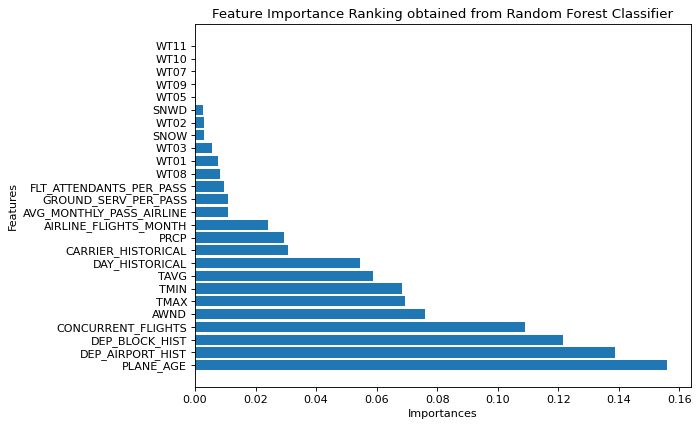

In [15]:
importances = pd.DataFrame({
    "Feature": list(XNormed.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
del importances
del model
#del X
#del y

## Logistic Regression

Run Logistic Regression model. Results are not very strong - recall is only 0.03 for delayed flights meaning that we are missing most of the delays.

[[2441526   11860]
 [ 556614   15221]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90   2453386
           1       0.56      0.03      0.05    571835

    accuracy                           0.81   3025221
   macro avg       0.69      0.51      0.47   3025221
weighted avg       0.77      0.81      0.74   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


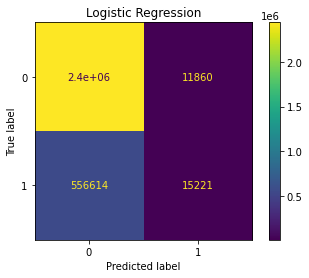

In [20]:
#model = LogisticRegression(solver='lbfgs', max_iter = 500)
#model.fit(features_train, labels_train)

#joblib.dump(model, "data/Classifiers/LogisticRegression.joblib")
model = joblib.load("data/Classifiers/LogisticRegression.joblib")

model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression")
print(conf_mat_plot)

## Decision Tree Classifer

Running Decision Tree Classifier improves recall for delays but has overall lower accuracy than Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.82      0.83   2453386
           1       0.29      0.31      0.30    571835

    accuracy                           0.72   3025221
   macro avg       0.56      0.56      0.56   3025221
weighted avg       0.73      0.72      0.73   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


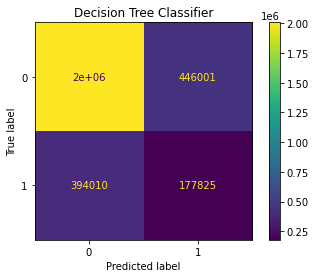

In [23]:
#model = DecisionTreeClassifier()
#model.fit(features_train, labels_train)
#joblib.dump(model, "data/Classifiers/DecisionTreeClassifier.joblib")
model = joblib.load("data/Classifiers/DecisionTreeClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier")
print(conf_mat_plot)

## Gradient Boosting

Once again with gradient boosting we see a better accuracy with low recall score for delays.

              precision    recall  f1-score   support

           0       0.82      0.99      0.90   2453386
           1       0.60      0.05      0.08    571835

    accuracy                           0.81   3025221
   macro avg       0.71      0.52      0.49   3025221
weighted avg       0.78      0.81      0.74   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


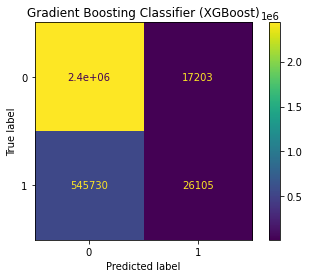

In [24]:
#model = GradientBoostingClassifier()
#model.fit(features_train, labels_train)
#joblib.dump(model, "data/Classifiers/GradientBoostingClassifier.joblib")

model = joblib.load("data/Classifiers/GradientBoostingClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Gradient Boosting Classifier (XGBoost)")
print(conf_mat_plot)


## Random Forest

Random Forest falls in the middle of the others with improved recall for delays and accuracy as good as logistic regression and gradient boosting.

[[2371032   82354]
 [ 484908   86927]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89   2453386
           1       0.51      0.15      0.23    571835

    accuracy                           0.81   3025221
   macro avg       0.67      0.56      0.56   3025221
weighted avg       0.77      0.81      0.77   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


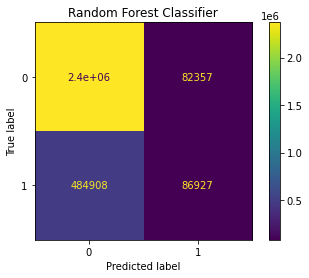

In [25]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/RandomForestClassifier.joblib")
#model = joblib.load("data/Classifiers/RandomForestClassifier.joblib")

model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier")
print(conf_mat_plot)

del model
del model_pred

## Extra Trees

Extra trees has improved recall for delays and higher accuracy overall.

[[2325026  128360]
 [ 467508  104327]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89   2453386
           1       0.45      0.18      0.26    571835

    accuracy                           0.80   3025221
   macro avg       0.64      0.57      0.57   3025221
weighted avg       0.76      0.80      0.77   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


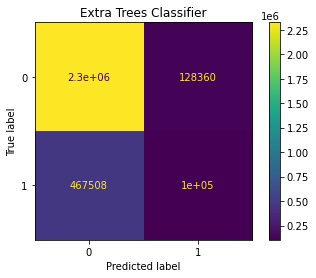

In [33]:
#model = ExtraTreesClassifier(n_jobs=-1)
#model.fit(features_train, labels_train)
#joblib.dump(model, "data/Classifiers/ExtraTreesClassifier.joblib")
model = joblib.load("data/Classifiers/ExtraTreesClassifier.joblib")

model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Extra Trees Classifier")
print(conf_mat_plot)
#plt.savefig("Img/05_09_ETC_Confusion_Matrix")


## Result

Running our models based only on the weather variables did not produce very good prediction results. 

|     Classification Model     |  |      |        |      |  Performance Metric        |      |          |   |
|:----------------------------:|:------------------:|:----:|:------:|:----:|:--------:|:----:|:--------:|:-:|
|                              |      Precision     |      | Recall |      | F1 Score |      | Accuracy |   |
|                              |         0.0        |  1.0 |   0.0  |  1.0 |    0.0   |  1.0 |          |   |
|      Logistic Regression     | 0.81               | 0.45 | 1.00   | 0.00 | 0.90     | 0.01 | 0.81     |   |
|   Decision Tree Classifier   | 0.82               | 0.49 | 0.99   | 0.06 | 0.89     | 0.10 | 0.81     |   |
|    Extra Trees Classifier    | 0.82               | 0.49 | 0.99   | 0.06 | 0.189    | 0.10 | 0.81     |   |
| Gradient Boosting Classifier | 0.81               | 0.64 | 1.00   | 0.00 | 0.90     | 0.01 | 0.81     |   |
|   Random Forest Classifier   | 0.83               | 0.44 | 0.98   | 0.06 | 0.89     | 0.11 | 0.81     |   |

In [34]:
# Setup
perf_df = pd.DataFrame(columns=["classifiers", "fpr", "tpr", "auc"])

# Handling Extra Trees Classifier separately due to memory constraints
fpr, tpr, _ = roc_curve(labels_test,  model_pred)
auc = roc_auc_score(labels_test, model_pred)
# Record the results
perf_df = perf_df.append({"classifiers": "ExtraTreesClassifier",
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
del model
del model_pred

classifiers = ["LogisticRegression", "DecisionTreeClassifier", "GradientBoostingClassifier", "RandomForestClassifier"]
for clf in classifiers:
    # Load the trained classifiers
    model = joblib.load(f"data/Classifiers/{clf}.joblib")
    model_pred = model.predict(features_test)
    fpr, tpr, _ = roc_curve(labels_test,  model_pred)
    auc = roc_auc_score(labels_test, model_pred)
    # Record the results
    perf_df = perf_df.append({"classifiers": clf,
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
    del model
    del model_pred

# Set name of the classifiers as index labels
perf_df.set_index("classifiers", inplace=True)

/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_5908/902646317.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"classifiers": "ExtraTreesClassifier",
/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_5908/902646317.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"classifiers": clf,
/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_5908/902646317.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"classifiers": clf,
/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_5908/902646317.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

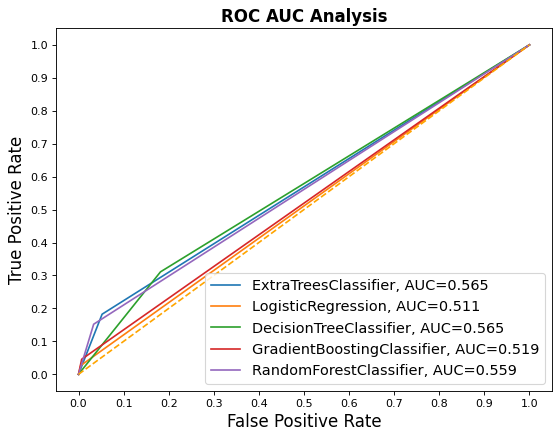

In [37]:
fig = plt.figure(figsize=(8,6), dpi=80)
for clf_name in perf_df.index:
    plt.plot(perf_df.loc[clf_name]["fpr"], 
             perf_df.loc[clf_name]["tpr"], 
             label="{}, AUC={:.3f}".format(clf_name, perf_df.loc[clf_name]["auc"]))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()
fig.savefig("data/Img/05_10_Classifiers_ROC_AUC.png")

## Explanation

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

** Based on the AUC Extra Trees Classifier and Decision Tree Classifier performed the best **

However, our AUC is just barely over 0.5 meaning the overall accuracy of our models is not very good. How can it be improved?

1. Handling Imbalances
2. Restricting the Data - are we able to improve prediction by looking only at certain airports?
3. Predicting